In [22]:
import pandas as pd
import math
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

df_mpu6050 = pd.read_csv("../serial-read/dados_mpu6050.csv")


In [23]:

print("Informações do DataFrame")
df_mpu6050["value_spect"]=0;
print(df_mpu6050.info())


Informações do DataFrame
<class 'pandas.DataFrame'>
RangeIndex: 108278 entries, 0 to 108277
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   timestamp_us  108276 non-null  float64
 1   ax_g          108278 non-null  float64
 2   ay_g          108278 non-null  float64
 3   az_g          108278 non-null  float64
 4   gx_dps        108278 non-null  float64
 5   gy_dps        108278 non-null  float64
 6   gz_dps        108278 non-null  float64
 7   temp_c        108278 non-null  float64
 8   dropped       108278 non-null  str    
 9   value_spect   108278 non-null  int64  
dtypes: float64(8), int64(1), str(1)
memory usage: 8.3 MB
None


In [24]:
print("Quantidade de linhas:")
print(df_mpu6050.size)

Quantidade de linhas:
1082780


In [25]:
print(df_mpu6050.head())

df_mpu6050["az_g"]-=1

print(df_mpu6050.head())

   timestamp_us    ax_g    ay_g    az_g  gx_dps  gy_dps  gz_dps  temp_c  \
0      906853.0 -0.0457 -0.0067  0.9493 -1.6947 -0.0305 -1.1832   26.59   
1      911853.0 -0.0431 -0.0065  0.9576 -1.6412 -0.1145 -1.1679   26.62   
2      916853.0 -0.0427 -0.0145  0.9310 -1.6565 -0.1298 -1.2137   26.62   
3      921853.0 -0.0509 -0.0059  0.9933 -1.6260 -0.0305 -1.2748   26.64   
4      926853.0 -0.0375 -0.0197  0.9917 -1.8626 -0.2137 -1.1679   26.62   

  dropped  value_spect  
0       0            0  
1       0            0  
2       0            0  
3       0            0  
4       0            0  
   timestamp_us    ax_g    ay_g    az_g  gx_dps  gy_dps  gz_dps  temp_c  \
0      906853.0 -0.0457 -0.0067 -0.0507 -1.6947 -0.0305 -1.1832   26.59   
1      911853.0 -0.0431 -0.0065 -0.0424 -1.6412 -0.1145 -1.1679   26.62   
2      916853.0 -0.0427 -0.0145 -0.0690 -1.6565 -0.1298 -1.2137   26.62   
3      921853.0 -0.0509 -0.0059 -0.0067 -1.6260 -0.0305 -1.2748   26.64   
4      926853.0 -0.0375 

In [26]:
meanAcX = df_mpu6050["ax_g"].mean()
meanAcY = df_mpu6050["ay_g"].mean()
meanAcZ = df_mpu6050["az_g"].mean()

meanGyrX = df_mpu6050["gx_dps"].mean()
meanGyrY = df_mpu6050["gy_dps"].mean()
meanGyrZ = df_mpu6050["gz_dps"].mean()

meanTemp = df_mpu6050["temp_c"].mean()


correction_factor = {}



correction_factor.update({"ax_g":meanAcX , "ay_g": meanAcY , "az_g": meanAcZ})

correction_factor.update({"gx_dps":meanGyrX ,"gy_dps":meanGyrY, "gz_dps":meanGyrZ})





print(f"Média do vetor acelerometro: ({meanAcX} , {meanAcY} , {meanAcZ} )")

print(f"Media do vetor giroscopio ({meanGyrX}, {meanGyrY}, {meanGyrZ})")

print(f"Temperatura média {meanTemp} ")




Média do vetor acelerometro: (-0.04574351853562127 , -0.010799607491826594 , -0.03767737582888491 )
Media do vetor giroscopio (-1.7234902704150432, 0.06561444337723268, -1.196246905188496)
Temperatura média 27.872663883706753 


In [27]:

moduleAcc = math.sqrt( math.pow(meanAcX,2) + math.pow(meanAcY,2) + math.pow(meanAcZ,2) )

moduleGyr = math.sqrt( math.pow(meanGyrX,2) + math.pow(meanGyrY,2) + math.pow(meanGyrZ,2))


print(f"Modulo do vetor Acc médio = {moduleAcc}")

print(f"Modulo do vetor Gyr médio = {moduleGyr}")

Modulo do vetor Acc médio = 0.06023857285284309
Modulo do vetor Gyr médio = 2.098983236133171


In [28]:
stdAcX = df_mpu6050["ax_g"].std()
stdAcY = df_mpu6050["ay_g"].std()
stdAcZ = df_mpu6050["az_g"].std()

stdGyrX = df_mpu6050["gx_dps"].std()
stdGyrY = df_mpu6050["gy_dps"].std()
stdGyrZ = df_mpu6050["gz_dps"].std()



print(f"Desvio padrão (AcX, AcY, AcZ) = {stdAcX} , {stdAcY}, {stdAcZ}")

print(f"Desvio padrão (GyrX, GyrY, GyrZ) = {stdGyrX} , {stdGyrY}, {stdGyrZ}")




Desvio padrão (AcX, AcY, AcZ) = 0.0030293403270227038 , 0.0027005578449914827, 0.004056420969595663
Desvio padrão (GyrX, GyrY, GyrZ) = 0.062477260640924945 , 0.05919906720942323, 0.05011258233701453


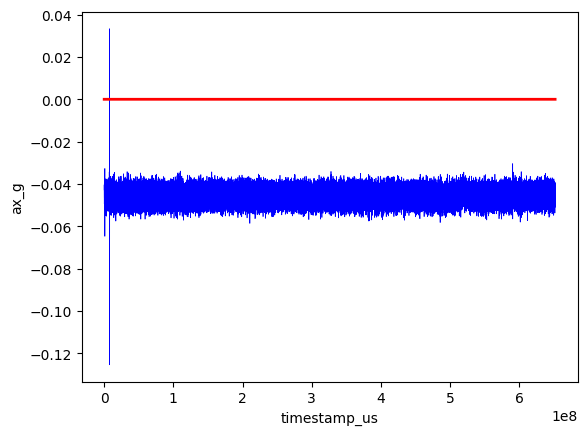

In [32]:



sns.lineplot(data=df_mpu6050 , x ="timestamp_us" , y="ax_g", color="blue", linewidth=0.5)
sns.lineplot(data=df_mpu6050, x="timestamp_us", y="value_spect", color="red", linewidth=2)
plt.savefig("./img/ax_g.png")



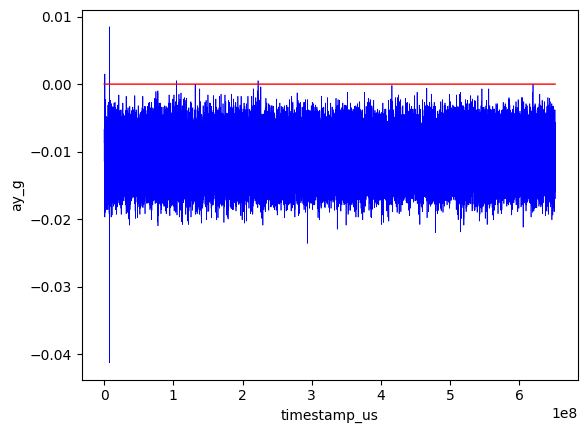

In [33]:


sns.lineplot(data=df_mpu6050 , y="ay_g", x="timestamp_us",linewidth=0.5, color="blue")
sns.lineplot(data=df_mpu6050 , y="value_spect", x="timestamp_us",linewidth=1, color="red")
plt.savefig("./img/ay_g.png")




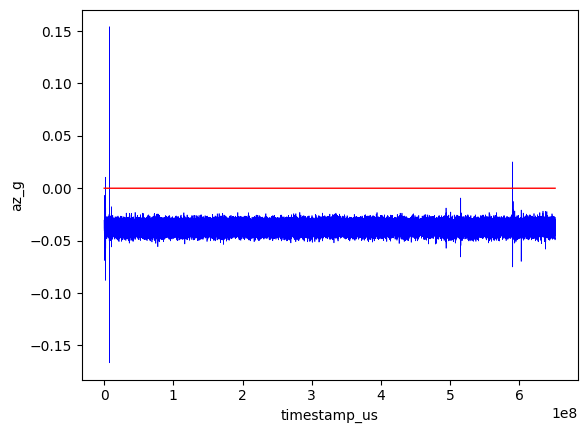

In [34]:



sns.lineplot(data=df_mpu6050 , y="az_g", x="timestamp_us",linewidth=0.5, color="blue")
sns.lineplot(data=df_mpu6050 , y="value_spect", x="timestamp_us",linewidth=1, color="red")
plt.savefig("./img/az_g.png")


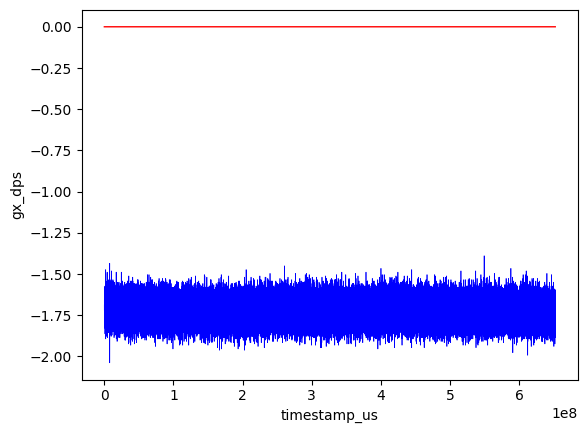

In [36]:
sns.lineplot(data=df_mpu6050 , y="gx_dps", x="timestamp_us",linewidth=0.5, color="blue")
sns.lineplot(data=df_mpu6050 , y="value_spect", x="timestamp_us",linewidth=1, color="red")
plt.savefig("./img/gx_dps.png")

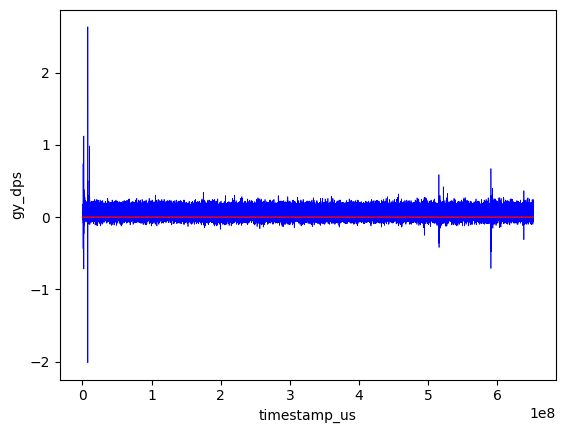

In [39]:
sns.lineplot(data=df_mpu6050 , y="gy_dps", x="timestamp_us",linewidth=0.5, color="blue")
sns.lineplot(data=df_mpu6050 , y="value_spect", x="timestamp_us",linewidth=1, color="red")
plt.savefig("./img/gy_dps.png")

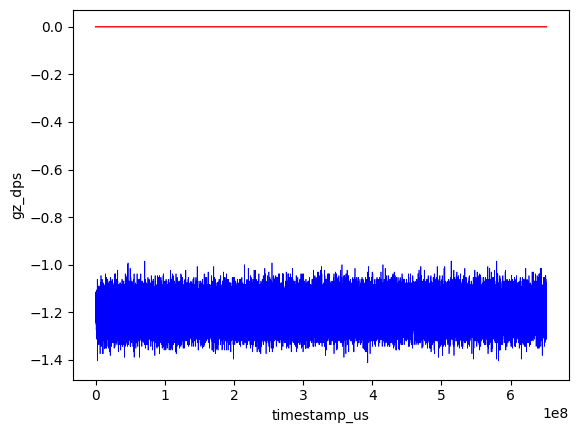

In [38]:
sns.lineplot(data=df_mpu6050 , y="gz_dps", x="timestamp_us",linewidth=0.5, color="blue")
sns.lineplot(data=df_mpu6050 , y="value_spect", x="timestamp_us",linewidth=1, color="red")
plt.savefig("./img/gz_dps.png")

In [41]:


df_mpu6050_fixed = df_mpu6050


for key,value in correction_factor.items():
    
    df_mpu6050_fixed[key]-=value
    
    



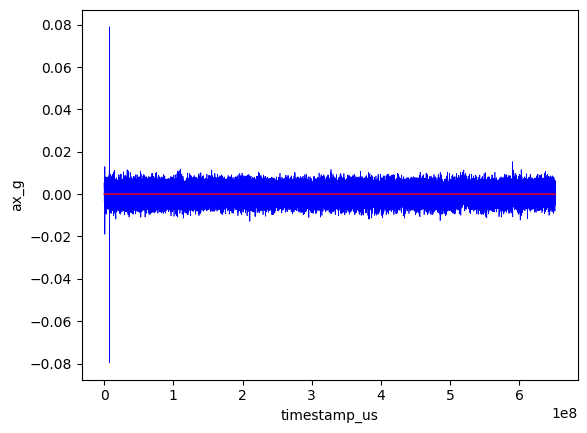

In [44]:


sns.lineplot(data=df_mpu6050_fixed,x="timestamp_us",y="ax_g", linewidth=0.5, color="blue")
sns.lineplot(data=df_mpu6050_fixed, x="timestamp_us", y="value_spect", linewidth=1, color="red")
plt.savefig("./img/ax_g_fixed.png")




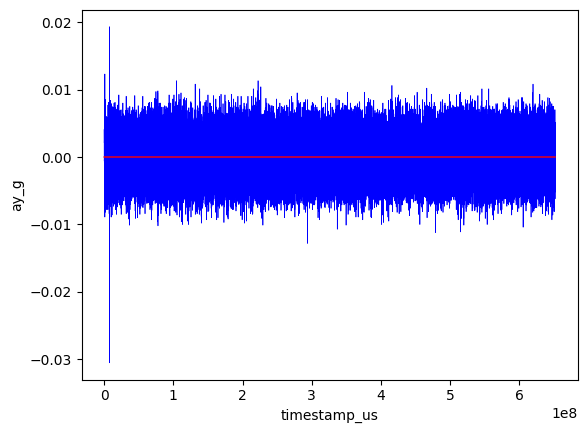

In [46]:


sns.lineplot(data=df_mpu6050_fixed, x="timestamp_us", y="ay_g", linewidth=0.5, color="blue")
sns.lineplot(data=df_mpu6050_fixed, x="timestamp_us", y="value_spect", linewidth=1, color="red")

plt.savefig("./img/ay_g_fixed.png")

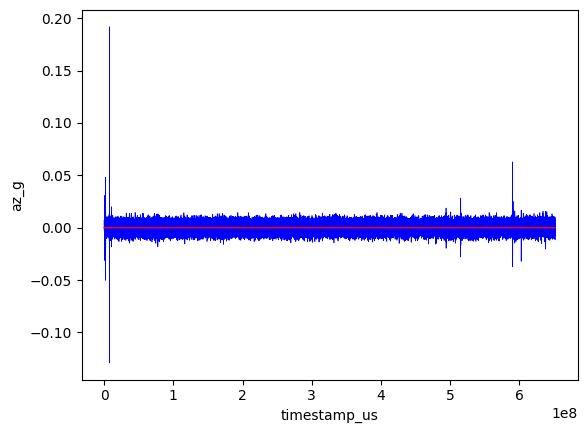

In [47]:

sns.lineplot(data=df_mpu6050_fixed, x="timestamp_us", y="az_g", linewidth=0.5, color="blue")
sns.lineplot(data=df_mpu6050_fixed, x="timestamp_us", y="value_spect", linewidth=1, color="red")

plt.savefig("./img/az_g_fixed.png")

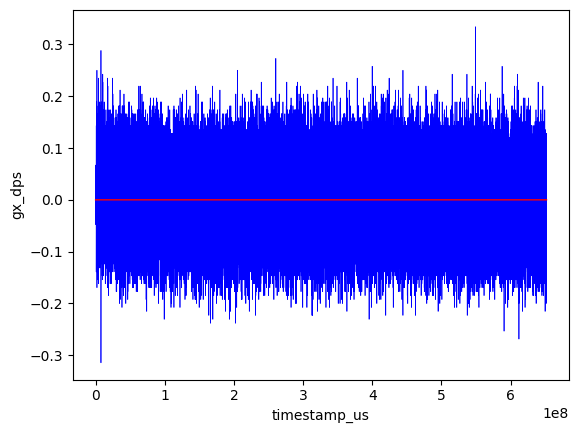

In [48]:

sns.lineplot(data=df_mpu6050_fixed, x="timestamp_us", y="gx_dps", linewidth=0.5, color="blue")
sns.lineplot(data=df_mpu6050_fixed, x="timestamp_us", y="value_spect", linewidth=1, color="red")

plt.savefig("./img/gx_dps_fixed.png")

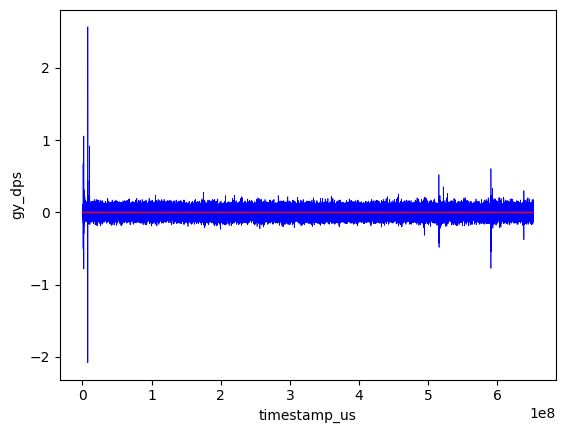

In [49]:
sns.lineplot(data=df_mpu6050_fixed, x="timestamp_us", y="gy_dps", linewidth=0.5, color="blue")
sns.lineplot(data=df_mpu6050_fixed, x="timestamp_us", y="value_spect", linewidth=1, color="red")

plt.savefig("./img/gy_dps_fixed.png")

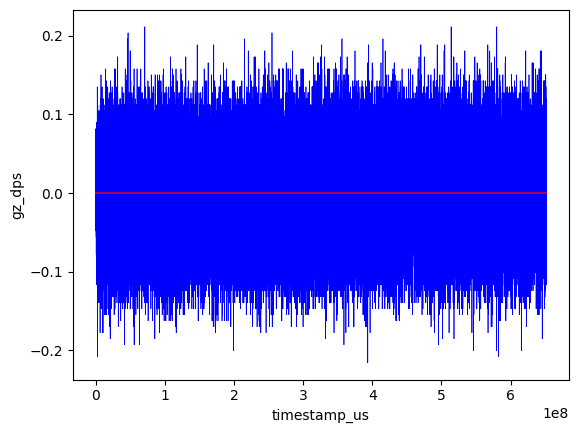

In [50]:
sns.lineplot(data=df_mpu6050_fixed, x="timestamp_us", y="gz_dps", linewidth=0.5, color="blue")
sns.lineplot(data=df_mpu6050_fixed, x="timestamp_us", y="value_spect", linewidth=1, color="red")

plt.savefig("./img/gz_dps_fixed.png")